# Decision Tree Regressor

In [19]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
%matplotlib inline
%run -i ../../tools/predict_functions_new.py

In [3]:
data_2014_2 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2014_2.csv', delimiter=';')
S_Data = data_2014_2.sort_values(by='PUNT_MATEMATICAS')

In [4]:
y_list=['DECIL_LECTURA_CRITICA', 'PUNT_LECTURA_CRITICA', 'DECIL_MATEMATICAS', 'PUNT_MATEMATICAS', 'DECIL_C_NATURALES',
        'PUNT_C_NATURALES', 'DECIL_SOCIALES_CIUDADANAS', 'PUNT_SOCIALES_CIUDADANAS', 'DECIL_INGLES', 'DESEMP_INGLES',
        'PUNT_INGLES', 'DECIL_RAZONA_CUANT', 'PUNT_RAZONA_CUANT', 'DECIL_COMP_CIUDADANA', 'PUNT_COMP_CIUDADANA', 
        'PUNT_GLOBAL', 'ESTU_PUESTO']
new_y_list = ['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES',
             'PUNT_RAZONA_CUANT', 'PUNT_COMP_CIUDADANA', 'PUNT_GLOBAL']
X_list = S_Data.columns.difference(y_list)

In [4]:
X = S_Data.filter(items = X_list)
Y = S_Data.filter(items = new_y_list)

Mean Score: 11.451803767
Takes: 235.05274987220764 seconds


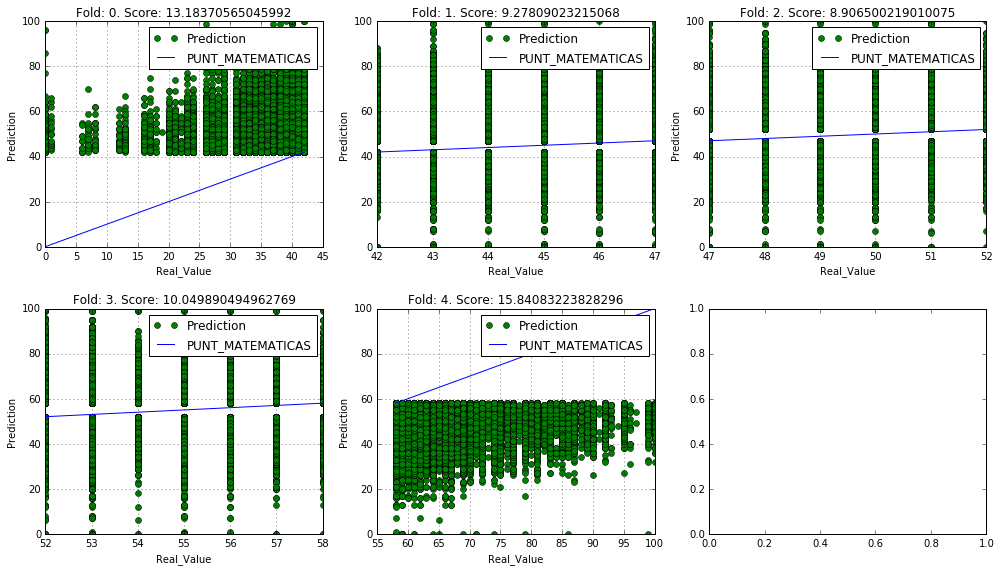

In [25]:
st = time()
tree = DecisionTreeRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', X, Y, kf)
print('Takes:', time()-st, 'seconds')

Mean Score: 9.43248357424
Takes: 227.72424387931824 seconds


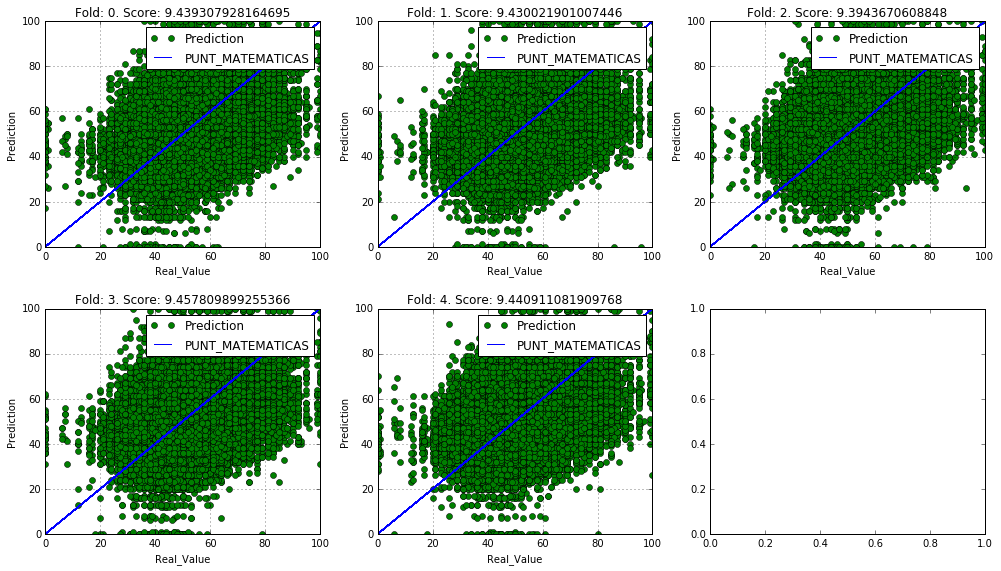

In [26]:
st = time()
tree = DecisionTreeRegressor()
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', X, Y, rs)
print('Takes:', time()-st, 'seconds')

## Polynomial

EXP 2:

The Model with the Data raised to the power of 2 gives:
Mean Score: 11.4573455979


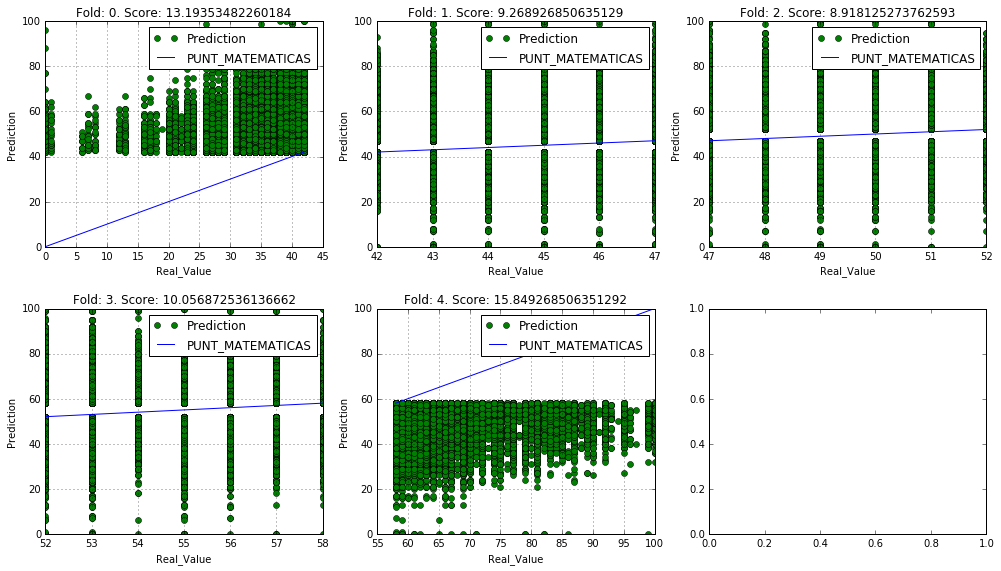

In [27]:
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_Data, 'PUNT_MATEMATICAS', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 9.43703197547
Takes: 239.01532196998596 seconds


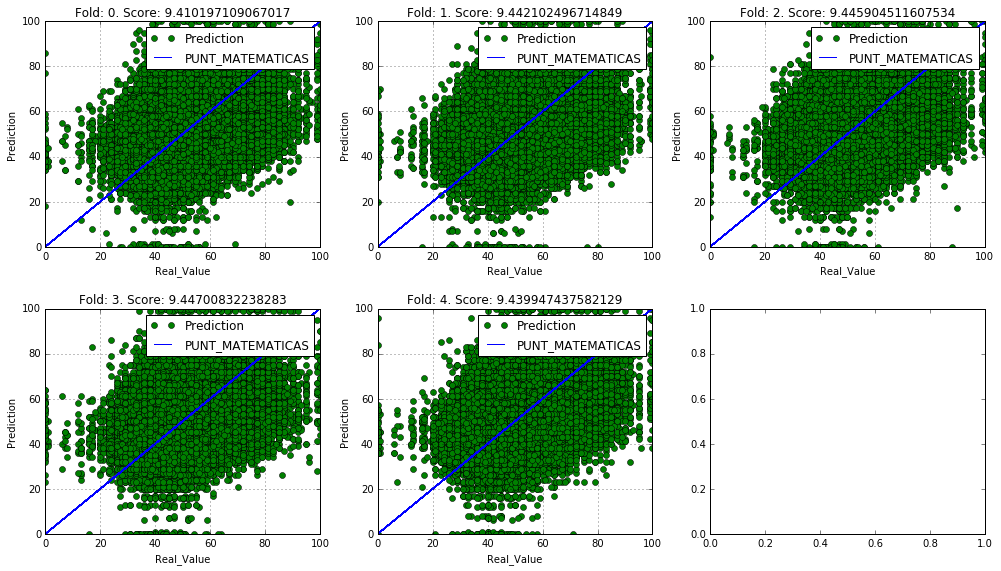

In [28]:
st = time()
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 2, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print('Takes:', time()-st, 'seconds')

EXP 3:

The Model with the Data raised to the power of 3 gives:
Mean Score: 11.4574209374
Takes: 239.05342388153076 seconds


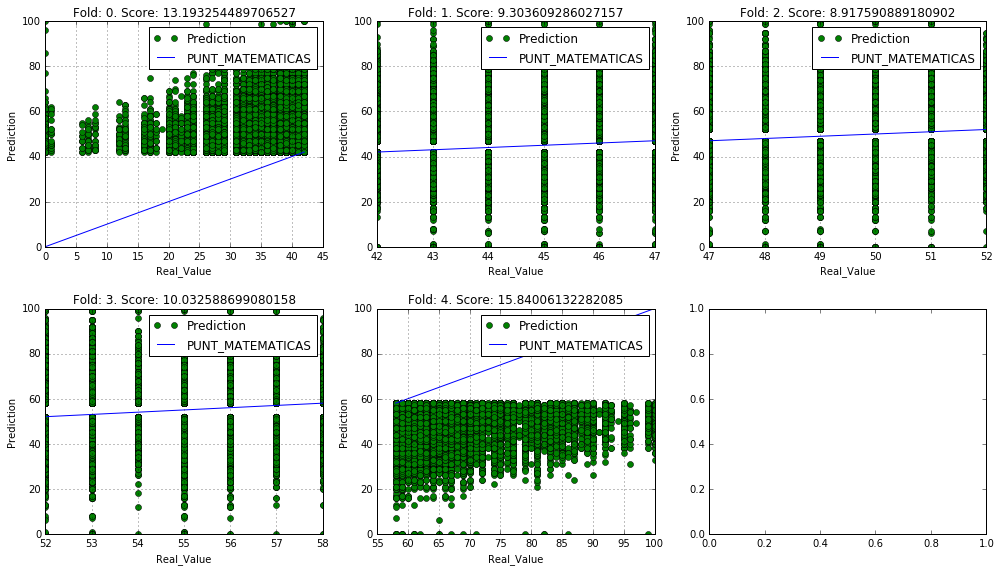

In [29]:
st = time()
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_Data, 'PUNT_MATEMATICAS', 5)
print('Takes:', time()-st, 'seconds')

The Model with the Data raised to the power of 3 gives:
Mean Score: 9.44427157249
Takes: 252.01457166671753 seconds


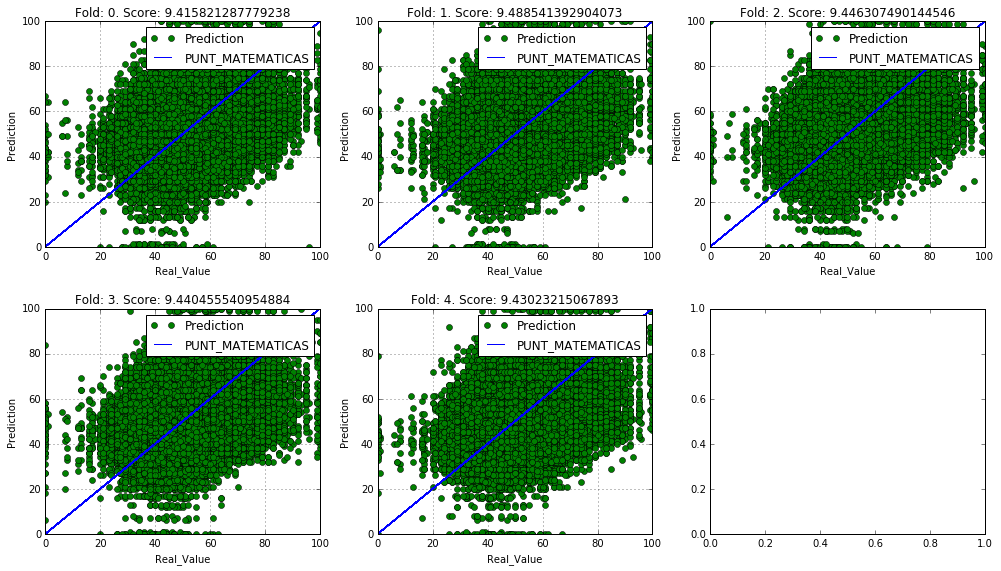

In [30]:
st = time()
tree = DecisionTreeRegressor()
get_exp_prediction(tree, 3, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print('Takes:', time()-st, 'seconds')

## Polynomial Features

degree 2:

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 11.4572334647
Takes: 4668.679455280304 seconds


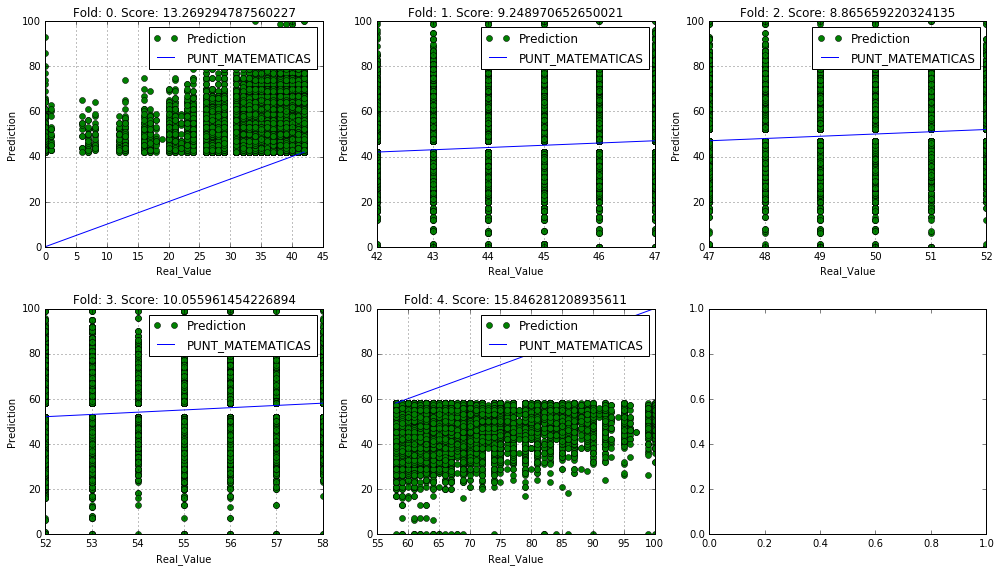

In [5]:
st = time()
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_Data, 'PUNT_MATEMATICAS', 5)
print('Takes:', time()-st, 'seconds')

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 9.45728953132
Takes: 3761.6162366867065 seconds


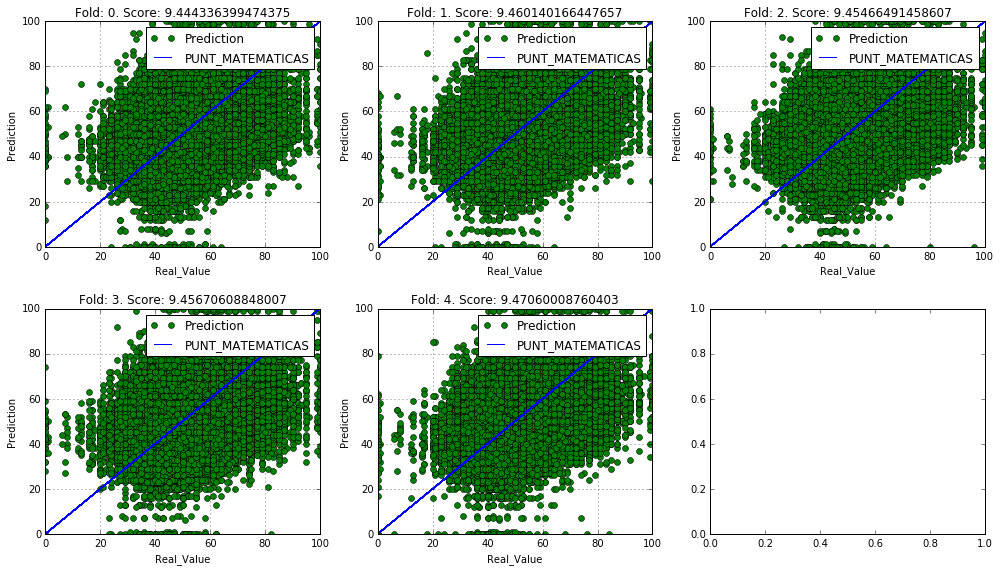

In [6]:
st = time()
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 2, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print('Takes:', time()-st, 'seconds')

degree 3:

In [14]:
st = time()
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 3, S_Data, 'PUNT_MATEMATICAS', 5)
print('Takes:', time()-st, 'seconds')

MemoryError: 

In [ ]:
st = time()
tree = DecisionTreeRegressor()
get_Poly_prediction(tree, 3, S_Data, 'PUNT_MATEMATICAS', 5, shuffle_split=True)
print('Takes:', time()-st, 'seconds')

## Trying with PCA

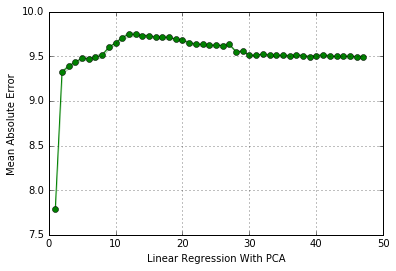

In [5]:
components = range(1,48)
cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(DecisionTreeRegressor(),
                                                                PCA(n_components=i).fit_transform(X),
                                                                Y['PUNT_MATEMATICAS'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in components]])
plt.plot(components, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Linear Regression With PCA")
plt.ylabel("Mean Absolute Error")

In [9]:
print('With', list(r[:,0]).index(min(r[:,0]))+1, 'components we can find the min error of:', min(r[:,0]))

With 1 components we can find the min error of: 7.79347410023


Mean Score: 7.78764091367
This one takes: 46.01111626625061


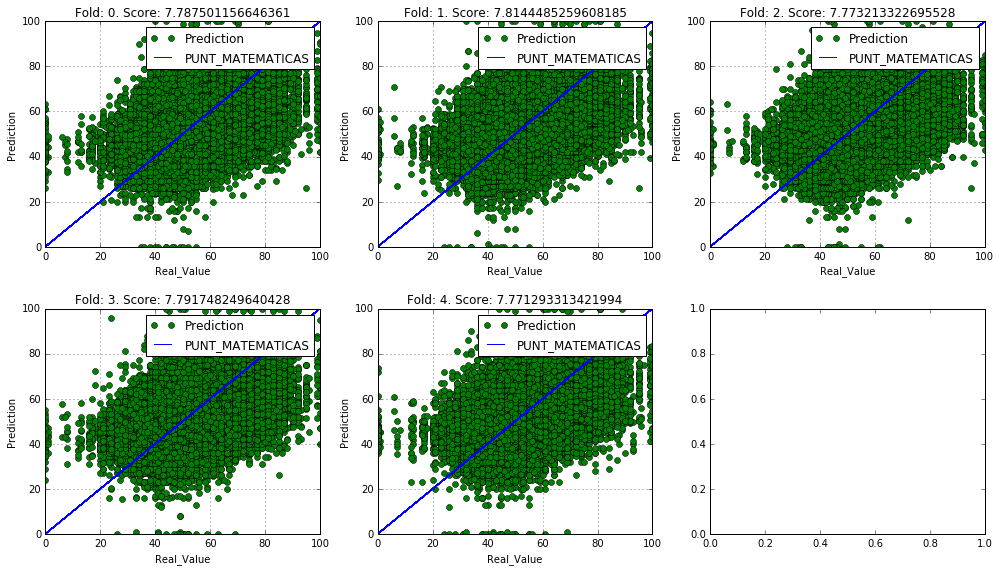

In [12]:
st = time()
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
tree = DecisionTreeRegressor()
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', pca_X, Y, rs)
print('This one takes:', time()-st)

## Obtained Results

|           |    1   |      2     |EXP 2 |     |EXP 3|     |Poly 2|     |Poly 3 |     |PCA-1components|
|-----------|-------:|-----------:|-----:|----:|----:|----:|-----:|----:|------:|----:|---------------:|
|           |Kfolds 5|ShuffleSplit|1     |2    |1    |2    |1     |2    |1      |2    |2               |
|MATEMATICAS|11.45   |9.43        |11.45 |9.43 |11.45|9.44 |11.45 |9.45 |ERROR  |ERROR|     7.78       |

The 3 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]     |Score/time[SEG]    |Score/time[SEG]   |
|--------:          |------------------:|-------------------:|------------------:|-----------------:|
|**Algorithm**      |ShuffleSplit 5     |EXP 2 + ShuffleSplit|EXP 3+ShuffleSplit |PCA(1 components) |
|**Old Data**       |9.43 / 227.72      |9.43/239.01         |9.44 / 252.01      |7.78 / 46.01      |

 

So according to the previous analysis, the **CHOSEN** way to predict will be the last one, with the data treated by a PCA of 1 component and Shuffle Split.

___

## Trying with the New X data.


In [5]:
New_X_list = ['FAMI_INTERNET', 'COLE_CARACTER', 'COLE_NATURALEZA', 'ESTU_ETNIA', 'ESTU_TIPO_CARRERA_DESEADA',
              'FAMI_PISOSHOGAR', 'ESTU_GENERO', 'ESTU_ZONA_RESIDE', 'ESTU_DEPTO_PRESENTACION', 'FAMI_CUARTOS_HOGAR',
              'ESTU_VECES_ESTADO', 'ESTU_COD_RESIDE_DEPTO', 'COLE_JORNADA', 'FAMI_OCUPA_PADRE', 'FAMI_OCUPA_MADRE',
              'FAMI_PERSONAS_HOGAR', 'FAMI_EDUCA_PADRE', 'ESTU_IES_MPIO_DESEADA', 'ESTU_NACIMIENTO_MES', 
              'ESTU_COD_PLANTEL', 'ESTU_MCPIO_PRESENTACION', 'FAMI_INGRESO_FMILIAR_MENSUAL', 'ESTU_IES_COD_DESEADA',
              'ESTU_NACIMIENTO_DIA', 'ESTU_EDAD', 'COLE_COD_ICFES', 'FAMI_NIVEL_SISBEN']
New_X = S_Data.filter(items = New_X_list)
New_Y = S_Data.filter(items = new_y_list)

Normal + ShuffleSplit

Mean Score: 9.464807709154622
Takes: 57.17568874359131 seconds


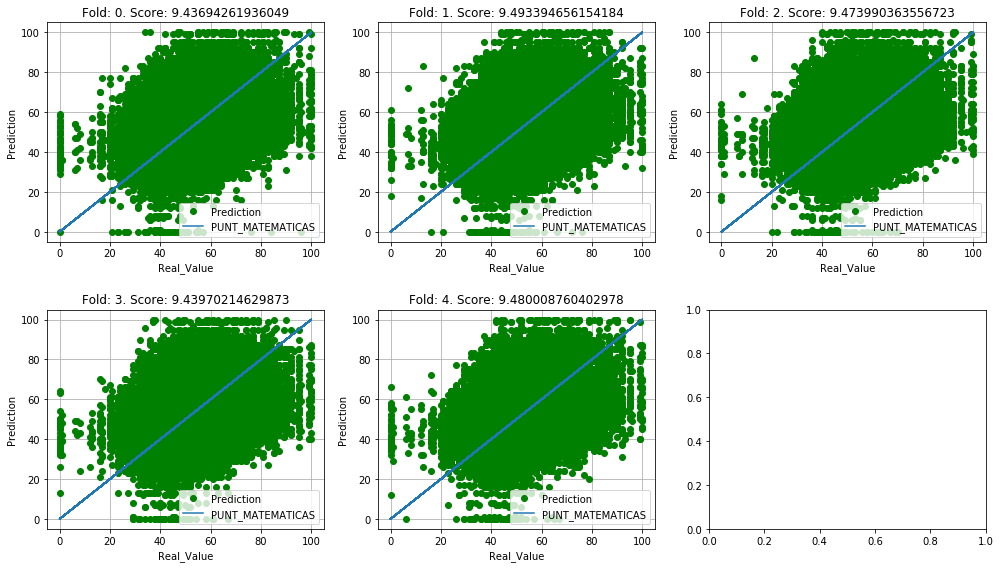

In [6]:
st = time()
tree = DecisionTreeRegressor()
rs = ShuffleSplit(n = New_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', New_X, New_Y, rs)
print('Takes:', time()-st, 'seconds')

EXP 2 + ShuffleSplit

Mean Score: 9.453065265002191
Takes: 108.65854072570801 seconds


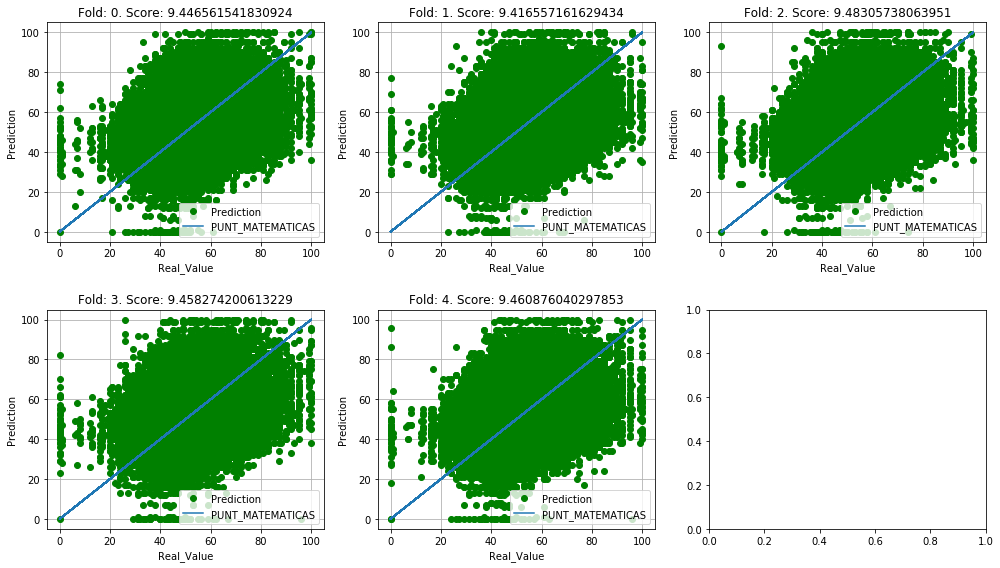

In [7]:
st = time()
tree = DecisionTreeRegressor()
exped_X = New_X**2
kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(0.2))
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', exped_X, New_Y, kf)
print('Takes:', time()-st, 'seconds')

EXP 3 + ShuffleSplit

Mean Score: 9.477464739378012
Takes: 53.71472215652466 seconds


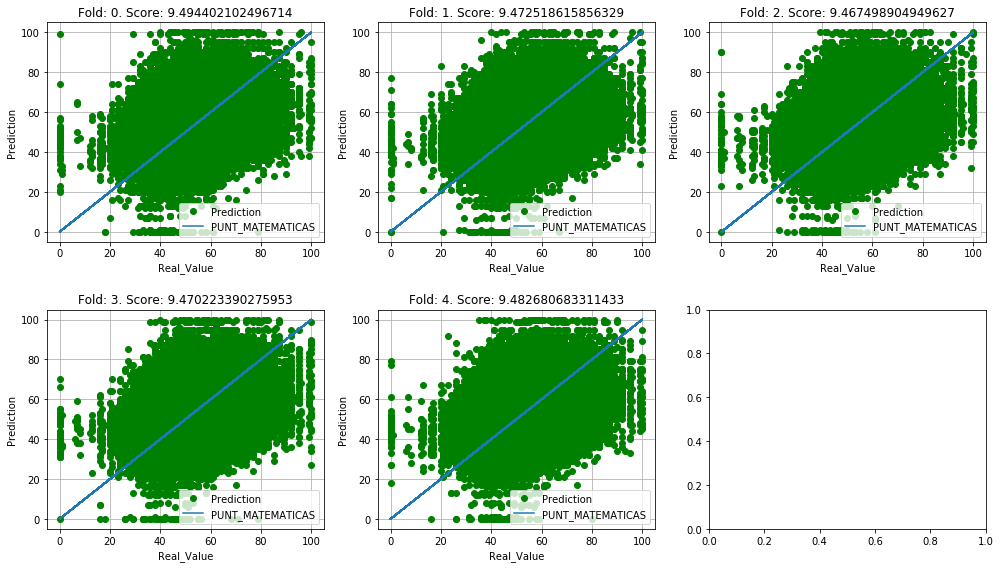

In [8]:
st = time()
tree = DecisionTreeRegressor()
exped_X = New_X**3
kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(0.2))
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', exped_X, New_Y, kf)
print('Takes:', time()-st, 'seconds')

PCA 1 component

data ready at: 3.2581639289855957 seconds
Mean Score: 7.796488281782371
Prediction takes: 15.194519996643066 seconds


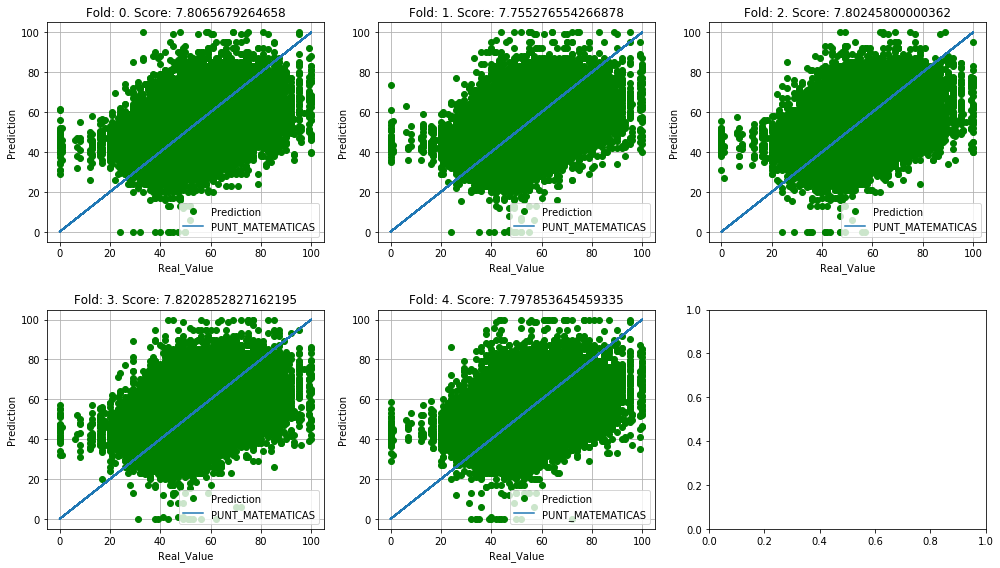

In [20]:
st = time()
pca = PCA(n_components=1)
pca_X = pca.fit_transform(New_X)
pca_X = pd.DataFrame(pca_X)
rs = ShuffleSplit(n_splits=5, test_size=0.2)
rs_split = rs.split(pca_X)
print('data ready at:', time()-st, 'seconds')
tree = DecisionTreeRegressor()
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', pca_X, New_Y, rs_split)
print('Prediction takes:', time()-st, 'seconds')

## Obtained Results

|           |    1   |      2     |EXP 2 |     |EXP 3|     |Poly 2|     |Poly 3 |     |PCA-1components|
|-----------|-------:|-----------:|-----:|----:|----:|----:|-----:|----:|------:|----:|---------------:|
|           |Kfolds 5|ShuffleSplit|1     |2    |1    |2    |1     |2    |1      |2    |2               |
|MATEMATICAS|11.45   |9.43        |11.45 |9.43 |11.45|9.44 |11.45 |9.45 |ERROR  |ERROR|     7.78       |

The 3 best algorithms are:  

|BEST ALGORITHMS    |Score/time[SEG]    |Score/time[SEG]     |Score/time[SEG]    |Score/time[SEG]   |
|--------:          |------------------:|-------------------:|------------------:|-----------------:|
|**Algorithm**      |ShuffleSplit 5     |EXP 2 + ShuffleSplit|EXP 3+ShuffleSplit |PCA(1 components) |
|**Old Data**       |9.43 / 227.72      |9.43/239.01         |9.44 / 252.01      |7.78 / 46.01      |
|**New Data**       |9.46 / 57.17       |9.45 / 108.65       |9.47 / 53.71       |7.79 / 15.19      |

 

So according to the previous analysis, the **CHOSEN** way to predict will be the last one, with the data treated by a PCA of 1 component and Shuffle Split.

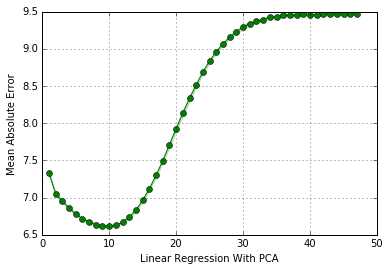

In [7]:
components = range(1,48)
cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(DecisionTreeRegressor(max_depth=i),
                                                                X,
                                                                Y['PUNT_MATEMATICAS'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in components]])
plt.plot(components, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Analysis of the deep")
plt.ylabel("Mean Absolute Error")

In [11]:
print('With', list(r[:,0]).index(min(r[:,0]))+1, 'levels we can find the min error of:', min(r[:,0]))

With 10 levels we can find the min error of: 6.61290620612


Mean Score: 7.20225612843
This one takes: 11.53219223022461


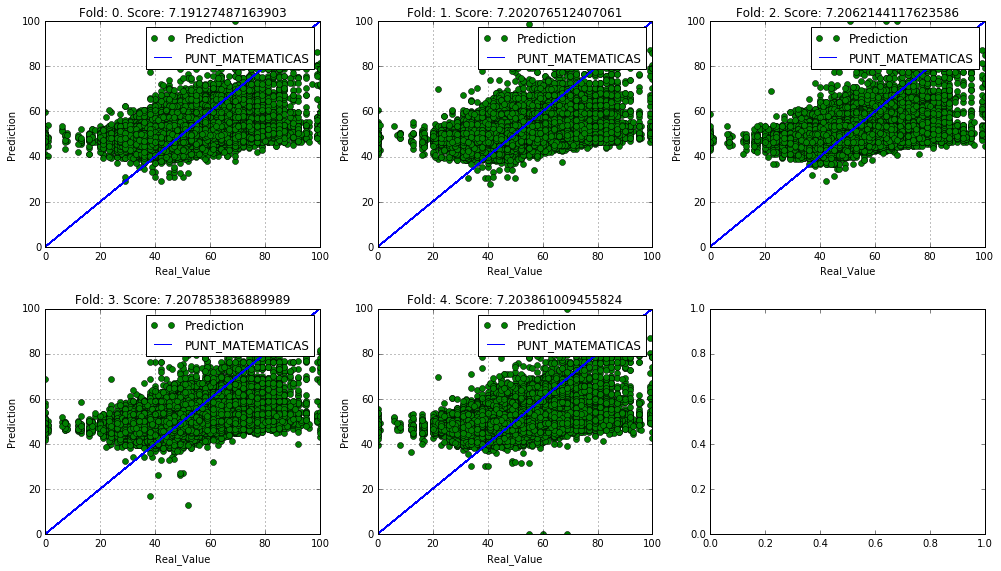

In [16]:
st = time()
pca = PCA(n_components=1)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
tree = DecisionTreeRegressor(max_depth=10)
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', pca_X, Y, rs)
print('This one takes:', time()-st)

Mean Score: 6.6186910053
This one takes: 32.922088623046875


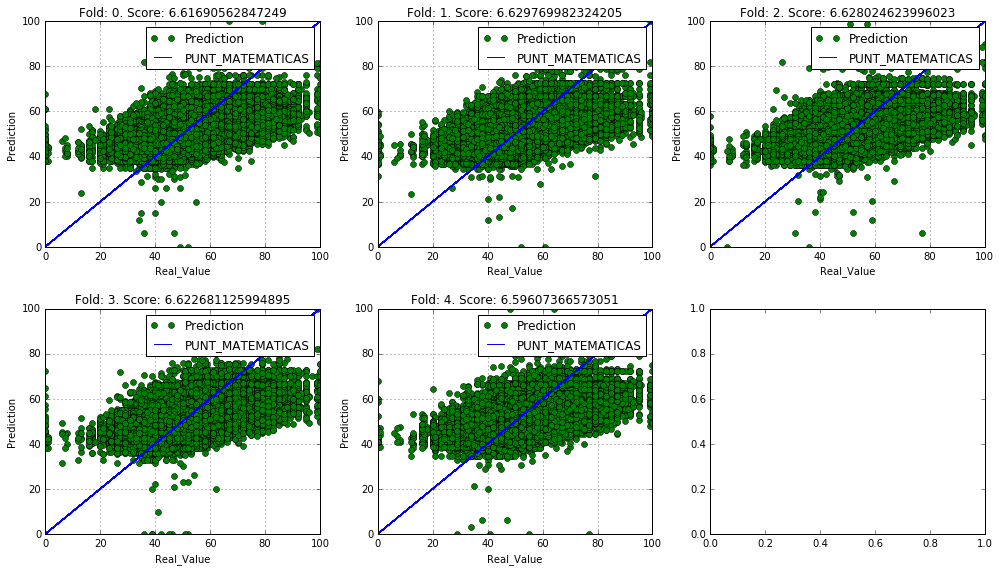

In [17]:
st = time()
tree = DecisionTreeRegressor(max_depth=10)
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(tree, 'PUNT_MATEMATICAS', X, Y, rs)
print('This one takes:', time()-st)

We did an extra test with the data without traetment, and the results were better...

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

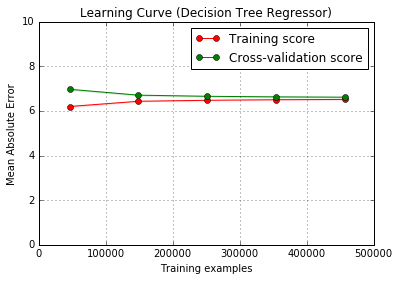

In [18]:
title = "Learning Curve (Decision Tree Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
estimator = DecisionTreeRegressor(max_depth=10)
plot_learning_curve(estimator, title, X, Y['PUNT_MATEMATICAS'], ylim=(0, 10), cv=cv, n_jobs=4)

# Conclusion

The **CHOSEN** way to predict:

* Decision Tree Regressor *max_depth* 10 + Data without any treatment + ShuffleSplit

Last Score Obtained: 

|Score[MAE]|Time[s]|
|---------:|------:|
|6.61      |32.92  |

Metric used: 

* For the Score was used the **Mean Absolute Error (MAE)** 
* For the time was used the **seconds unit (s)**